In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.image import AxesImage

In [2]:
sub_dirs = list(filter(lambda x: "subject" in x, os.listdir(path="cipic-hrtf-database-master/standard_hrir_database/")))
sub = {i[len(i)-3:len(i)]: i for i in sub_dirs}
sub, len(sub)

({'003': 'subject_003',
  '008': 'subject_008',
  '009': 'subject_009',
  '010': 'subject_010',
  '011': 'subject_011',
  '012': 'subject_012',
  '015': 'subject_015',
  '017': 'subject_017',
  '018': 'subject_018',
  '019': 'subject_019',
  '020': 'subject_020',
  '021': 'subject_021',
  '027': 'subject_027',
  '028': 'subject_028',
  '033': 'subject_033',
  '040': 'subject_040',
  '044': 'subject_044',
  '048': 'subject_048',
  '050': 'subject_050',
  '051': 'subject_051',
  '058': 'subject_058',
  '059': 'subject_059',
  '060': 'subject_060',
  '061': 'subject_061',
  '065': 'subject_065',
  '119': 'subject_119',
  '124': 'subject_124',
  '126': 'subject_126',
  '127': 'subject_127',
  '131': 'subject_131',
  '133': 'subject_133',
  '134': 'subject_134',
  '135': 'subject_135',
  '137': 'subject_137',
  '147': 'subject_147',
  '148': 'subject_148',
  '152': 'subject_152',
  '153': 'subject_153',
  '154': 'subject_154',
  '155': 'subject_155',
  '156': 'subject_156',
  '158': 'subjec

In [3]:
def read_subject_mat(subject_num):
    path = "cipic-hrtf-database-master/standard_hrir_database/"
    subject = f"subject_{subject_num}/"
    f = scipy.io.loadmat(path + subject + "hrir_final.mat")
    """ for i in f:
        print(i, f[i]) """
    return f

In [4]:
def read_custom_mat(path):
    f = scipy.io.loadmat(path)
    """ for i in f:
        print(i, f[i]) """
    return f

In [42]:
'''
                                            (-45 to 45 in steps of 5)
Azimuths are uniformly sampled as [-80 -65 -55 -45:5:45 55 65 80]
Elevations are uniformly sampled in 5.625 deg, from -45 deg to 230.625 deg
'''

'''
2D Arrays ITD, OnR & OnL hav 25 lists (25 different azimuths) (left to right).
Each list has 50 readings (50 different elevations) (top to bottom) at approx 5 deg angular increment
len(sub.itd) = 25
len(sub.itd[0]) = 50
'''

'''
3D Arrays hrir_r, hrir_l have 25 lists, each list has 50 lists, each list has 200 readings
len(sub.hrir) = 25
len(sub.hrir[0]) = 50
len(sub.hrir[0][0]) = 200

total readings per HRIR = 25 * 50 * 200 = 2,50,000

hrir -> time domain
fft(hrir) -> frequency domain -> hrtf
'''

class Subject:

    def __init__(self, id, onR, onL, itd, hrir_r, hrir_l):
        self.id = id
        self.onR = onR
        self.onL = onL
        self.itd = itd
        self.hrir_r = hrir_r
        self.hrir_l = hrir_l
    
    def get_hrtf_r(self, azimuth, elevation):
        return np.fft.fft(self.hrir_r[azimuth][elevation])

    def get_hrtf_l(self, azimuth, elevation):
        return np.fft.fft(self.hrir_l[azimuth][elevation])

In [6]:
'''
Kemar

len(left) = 200
len(left[0]) = 99
'''

class Kemar:

    def __init__(self, id, left, right):
        self.id = id
        self.left = left
        self.right = right

In [7]:
def assign_subject(subject_num):
    subject = read_subject_mat(subject_num)
    return Subject(subject_num, subject['OnR'], subject['OnL'], subject['ITD'], subject["hrir_r"], subject['hrir_l'])

In [8]:
def read_kemar_mat(kemar_axis, size):
    kemar_mat = None
    if (kemar_axis == "frontal"):
        if (size == "large"):
            kemar_mat = read_custom_mat("cipic-hrtf-database-master/special_kemar_hrir/kemar_frontal/large_pinna_frontal.mat")
        if (size == "small"):
            kemar_mat = read_custom_mat("cipic-hrtf-database-master/special_kemar_hrir/kemar_frontal/small_pinna_frontal.mat")
    if (kemar_axis == "horizontal"):
        if (size == "large"):
            kemar_mat = read_custom_mat("cipic-hrtf-database-master/special_kemar_hrir/kemar_horizontal/large_pinna_final.mat")
        if (size == "small"):
            kemar_mat = read_custom_mat("cipic-hrtf-database-master/special_kemar_hrir/kemar_horizontal/small_pinna_final.mat")
    kemar_sub = Kemar(kemar_axis + " " + size, kemar_mat["left"], kemar_mat["right"])
    return kemar_sub

In [45]:
'''
Set of 27 anthropometric readings
17 - head & 10 - torso
'''

anthro_mat = read_custom_mat("cipic-hrtf-database-master/anthropometry/anthro.mat")


hrtf_display_mat = read_custom_mat("cipic-hrtf-database-master\standard_hrir_database\show_data\hrtf_display.mat")
hor_hrtf_display_mat = read_custom_mat("cipic-hrtf-database-master\standard_hrir_database\show_data\hor_hrtf_display.mat")
''

''

In [36]:
subject_003 = assign_subject(subject_num="003")

The different types of plots present in the image are:

   * **Spectrogram**: A spectrogram is a visual representation of the frequency and time components of a signal. The spectrogram in the left panel shows the time-frequency representation of the left and right ear impulse responses.
   * **Head-related transfer function (HRTF)**: An HRTF is a function that describes how sound is transformed by the head and torso before reaching the eardrums. The HRTFs in the middle panel show the frequency response of the left and right ears for different azimuths and elevations.
   * **Interaural time difference (ITD)**: The ITD is the difference in time between the arrival of a sound at the left and right ears. The ITD in the right panel shows the ITD for the current azimuth and elevation.
   * **Interaural level difference (ILD)**: The ILD is the difference in level between the sound at the left and right ears. The ILD in the right panel shows the ILD for the current azimuth and elevation.

C:\Users\srika\AppData\Local\Temp\ipykernel_5624\4083922857.py:5: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=25).
  plt.specgram(subject_003.hrir_r, Fs=1000, cmap='jet')


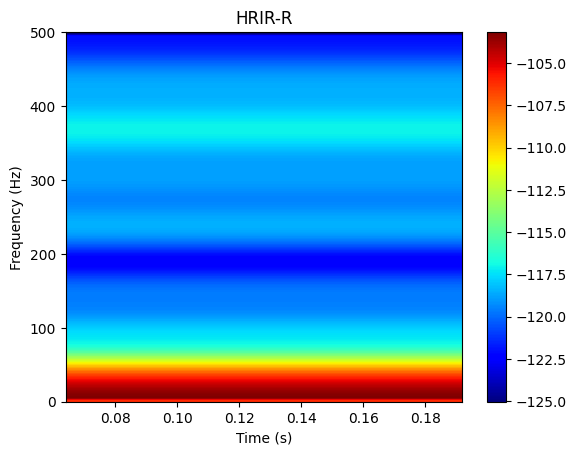

C:\Users\srika\AppData\Local\Temp\ipykernel_5624\4083922857.py:12: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=25).
  plt.specgram(subject_003.hrir_l, Fs=1000, cmap='jet')


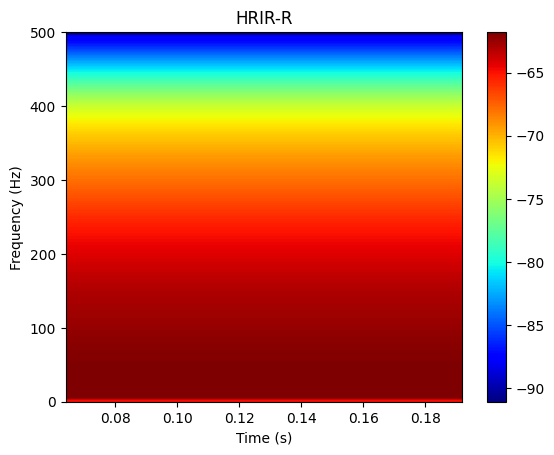

In [62]:
NFFT = 10
noverlap = 5

# Plot the data as a spectrogram
plt.specgram(subject_003.hrir_r, Fs=1000, cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('HRIR-R')
plt.colorbar()
plt.show()

plt.specgram(subject_003.hrir_l, Fs=1000, cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('HRIR-R')
plt.colorbar()
plt.show()

In [15]:
'''
KEMAR - the manikin for hearing aid testing and R&D - has been designed with median human adult dimensions and the ear simulation matches the acoustic response with an auricle, an ear canal, and an eardrum that equal the median ear in dimensions, acoustic impedance, and modes.

The KEMAR Mannequin from GRAS Sound and Vibration is an acoustic test fixture that provides the Head Related Transfer Function (HRTF) by simulating the physical characteristics of the human auditory system, head and torso. The KEMAR Mannequin is used to auditory research application and binaural recording/sound quality applications. When fitted with IEC 711 couplers, the KEMAR Mannequin provides a full simulation of the HRTF and is used for auditory research and communications equipment testing where the frequency response of the ear canal is included in the measurement.
'''

kemar_frontal_large = read_kemar_mat("frontal", "large")
kemar_frontal_small = read_kemar_mat("frontal", "small")
kemar_horizontal_large = read_kemar_mat("horizontal", "large")
kemar_horizontal_small = read_kemar_mat("horizontal", "small")

In [16]:
def hrir_r_l_plot(subject: Subject):

    Nr, Mr, Lr = subject.hrir_r.shape
    Nl, Ml, Ll = subject.hrir_l.shape
    # print(Nr, Mr, Lr)

    """ # Plot spectrograms for all spatial positions
    fig, axs = plt.subplots(Lr, 1, figsize=(10, 2*Lr), sharex=True, sharey=True)
    fig.suptitle('HRIR-R Spectrograms for Subject 003')

    for spatial_position_index in range(Lr):
        # Extract HRIR data for the current spatial position
        hrir_spatial = subject_003.hrir_r[:, :, spatial_position_index]
        '''
        In Python, `data[:, :, i]` is a way to index or slice a multi-dimensional array. 

        Here's what each part means:

        - `:`: This is a slice that selects all elements along a particular dimension. 
        - `i`: This selects the `i`-th element along a particular dimension.

        So, `data[:, :, i]` means "give me all data in the first and second dimensions, but only the `i`-th element in the third dimension". 

        In other words, it's selecting a 2D slice from a 3D array.
        '''

        # Plot the spectrogram
        im = axs[spatial_position_index].imshow(
            np.abs(hrir_spatial.T), aspect='auto', origin='lower', cmap='viridis'
            # cmap = 'plasma' | 'inferno' | 'magma' | 'coolwarm' | 'rainbow' | 'jet'
        )

        # Customize the plot
        axs[spatial_position_index].set_title(
            'Spatial Position {}'.format(spatial_position_index))
        axs[spatial_position_index].set_ylabel('Frequency Band Index')

    # Customize the overall plot
    plt.xlabel('Time/Frequency Index')
    fig.colorbar(im, ax=axs, orientation='vertical', label='Amplitude')

    plt.show() """


    # Plot spectrograms for all spatial positions for hrir_l and hrir_r side by side
    fig, axs = plt.subplots(Lr, 2, figsize=(10, 2*Lr), sharex=True, sharey=True)
    fig.suptitle('HRIR Spectrograms for Subject 003')

    for spatial_position_index in range(Lr):
        # Extract HRIR data for the current spatial position
        hrir_spatial_l = subject.hrir_l[:, :, spatial_position_index]
        hrir_spatial_r = subject.hrir_r[:, :, spatial_position_index]

        # Plot the spectrogram
        im_l = axs[spatial_position_index, 0].imshow(
            np.abs(hrir_spatial_l.T), aspect='auto', origin='lower', cmap='viridis'
            # cmap = 'plasma' | 'inferno' | 'magma' | 'coolwarm' | 'rainbow' | 'jet'
        )
        im_r = axs[spatial_position_index, 1].imshow(
            np.abs(hrir_spatial_r.T), aspect='auto', origin='lower', cmap='viridis'
            # cmap = 'plasma' | 'inferno' | 'magma' | 'coolwarm' | 'rainbow' | 'jet'
        )

        # Customize the plot
        axs[spatial_position_index, 0].set_title(
            'Spatial Position {}'.format(spatial_position_index))
        axs[spatial_position_index, 1].set_title(
            'Spatial Position {}'.format(spatial_position_index))
        axs[spatial_position_index, 0].set_ylabel('Frequency Band Index')

    # Customize the overall plot
    plt.xlabel('Time/Frequency Index')
    fig.colorbar(im_l, ax=axs[:, 0], orientation='vertical', label='Amplitude')
    fig.colorbar(im_r, ax=axs[:, 1], orientation='vertical', label='Amplitude')

    plt.show()


In [27]:
'''
Given the context and the structure of the data, `onL` and `onR` appear to be 2D arrays that represent some form of time-series data for the left and right channels (or ears) of the subject. 

The values in the arrays could represent many things, such as:

- The amplitude of the audio signal at different points in time.
- The onset times of certain events or sounds in the audio.
- The frequency content of the audio signal at different points in time.

Without more information about the nature of the experiment or the data collection process, it's hard to say for sure. 

The best way to understand what these arrays represent would be to refer to the documentation or comments in the code where `subject_003` is defined, or to ask the person who created the `subject_003` object.
'''

len(subject_003.itd)

25

In [41]:
# azimuth -> 0 to 24 -> [-80 -65 -55 -45:5:45 55 65 80]
# elevation -> 0 to 49 -> [-45:5:230.625]

subject_003.get_hrtf(0, 49)

array([-5.11115612e-01+0.00000000e+00j,  4.66450692e-01+2.94685819e-01j,
       -3.04328708e-01-5.26762610e-01j, -2.53511771e-01+7.40419180e-01j,
        6.62220435e-01-3.88592645e-02j, -2.67410466e-01-6.40778181e-01j,
       -3.65700156e-01+3.51531709e-01j,  3.23595114e-01+3.33411919e-01j,
        2.94132217e-01-3.71957994e-01j, -3.84315662e-01-2.58712221e-01j,
       -1.01393976e-01+4.75460070e-01j,  2.95520607e-01+4.27214153e-02j,
        5.70971929e-02-4.09798158e-01j, -2.78256631e-01+5.94636940e-02j,
        9.47239629e-03+3.45845131e-01j,  2.59980769e-01-1.94139043e-01j,
       -1.42586669e-01-1.98555663e-01j, -8.87436296e-02+2.09117619e-01j,
        8.91473637e-02+7.01780504e-02j,  9.49065643e-03-1.38360697e-01j,
       -3.85036976e-02-5.20260269e-03j, -1.06457403e-02+5.72941082e-02j,
        5.05534682e-02+2.23232655e-02j, -8.77691773e-03-8.26768176e-02j,
       -5.94892149e-02+4.63014120e-02j,  6.70692487e-02+2.37273038e-02j,
       -1.24062113e-02-8.12577420e-02j, -7.07398346

C:\Users\srika\AppData\Local\Temp\ipykernel_5624\240822896.py:14: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=50).
  frequencies, times, hrir_stft, img = plt.specgram(


Classification Result: Far


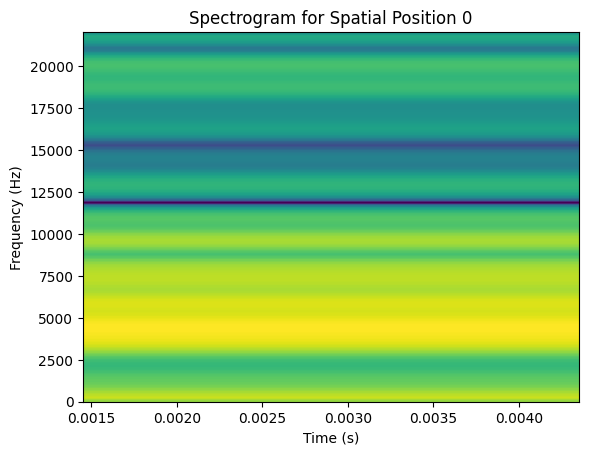

In [17]:
# Assuming hrir_data is your 3D matrix
# Dimensions: (N, M, L)

# Choose a spatial position (direction) for testing
spatial_position_index = 0
hrir_spatial = subject_003.hrir_r[:, :, spatial_position_index]

frequencies: np.array
times: np.array
hrir_stft: np.array
img: AxesImage

# Perform time-frequency analysis (STFT in this case)
frequencies, times, hrir_stft, img = plt.specgram(
    np.sum(hrir_spatial, axis=0), NFFT=256, Fs=44100, cmap='viridis'
)

# img.write_png("bleh.png")

# Feature extraction (example: maximum amplitude frequency)
max_amplitude_freq = frequencies[np.argmax(np.abs(hrir_stft), axis=0)]

# Decision (example: if the maximum frequency is above a threshold, classify as near)
threshold = 1000  # Adjust based on your data
classification_result = 'Near' if max_amplitude_freq > threshold else 'Far'

print(f"Classification Result: {classification_result}")

# Show the spectrogram for visualization
plt.title('Spectrogram for Spatial Position {}'.format(spatial_position_index))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


In [18]:
def itd_plot(subject: Subject):

    '''
    ITD is a 2D matrix
    Dimension: 25 x 50

    Unit is is ms ?
    '''
    plt.plot(subject.itd)

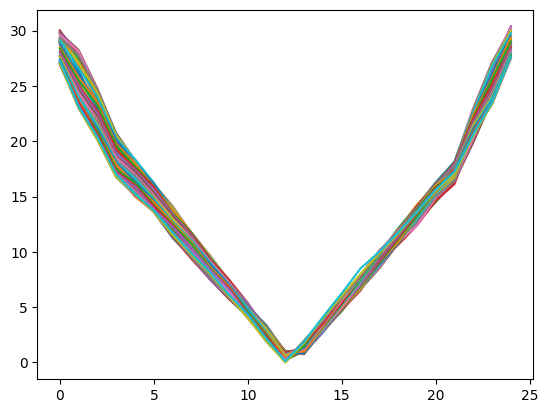

In [19]:
itd_plot(subject_003)